# Estimation of FRET efficiency for emission from quantum dots and absorption by diamond NV- center.


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

## quantum dot emission spectra

From [Meiling et al. 2018](https://doi.org/10.1021/acs.jpcc.7b12345) we have Figure 2 showing the steady-state photoluminescence emission spectroscopy:

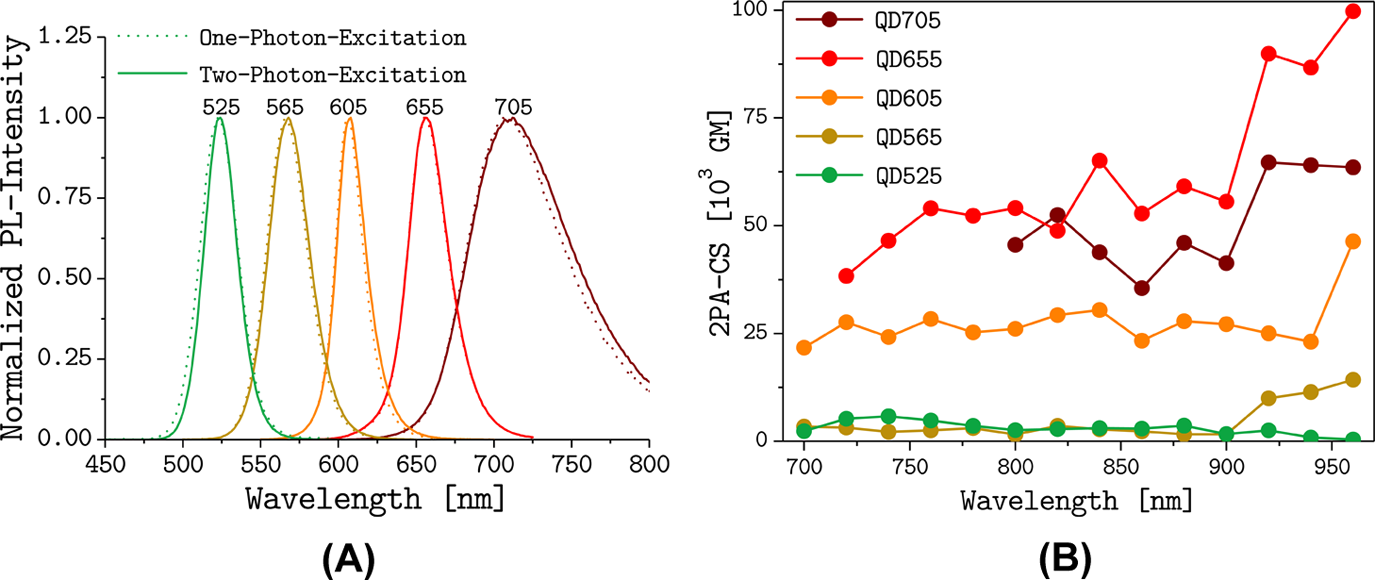

In [2]:
IPython.display.Image(filename="meiling2018fig2.png")

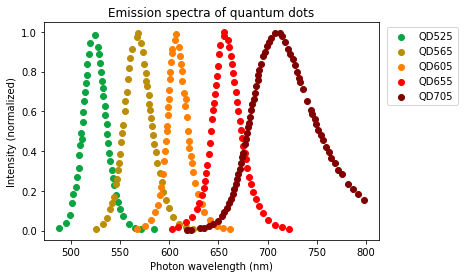

In [3]:
qd525_nm, qd525_intensity = np.loadtxt("QD525.csv", delimiter=',', unpack=True)
qd565_nm, qd565_intensity = np.loadtxt("QD565.csv", delimiter=',', unpack=True)
qd605_nm, qd605_intensity = np.loadtxt("QD605.csv", delimiter=',', unpack=True)
qd655_nm, qd655_intensity = np.loadtxt("QD655.csv", delimiter=',', unpack=True)
qd705_nm, qd705_intensity = np.loadtxt("QD705.csv", delimiter=',', unpack=True)
plt.clf()
plt.scatter(qd525_nm, qd525_intensity, label="QD525", color="#0BA440")
plt.scatter(qd565_nm, qd565_intensity, label="QD565", color="#BB8E0A")
plt.scatter(qd605_nm, qd605_intensity, label="QD605", color="#FF8001")
plt.scatter(qd655_nm, qd655_intensity, label="QD655", color="#FF0000")
plt.scatter(qd705_nm, qd705_intensity, label="QD705", color="#800000")

plt.title("Emission spectra of quantum dots")
plt.xlabel("Photon wavelength (nm)")
plt.ylabel("Intensity (normalized)")
plt.legend(loc="upper right", bbox_to_anchor=(1.25,1));

## NV- center absorption spectrum

In [4]:
nv_center_emission_nm, nv_center_emission_intensity, _, _, _, _ = np.loadtxt("../NV_center_emission.txt", unpack=True)
plt.clf()
plt.scatter(nv_center_emission_nm, nv_center_emission_intensity,color="tab:red")
plt.title("Emission spectrum of NV- center")
plt.xlabel("Photon wavelength (nm)")
plt.ylabel("Emission intensity (a.u.)");

OSError: ../NV_center_emission.txt not found.

> Figure 7. Comparison of one-photon and two-photon excited fluorescence spectra of nitrogen-vacancy centers in type Ib diamond treated with 3 MeV proton irradiation.

> Figure 7 displays the emission spectra of the (N-V)⁻ centers excited by 532 and 1064 nm laser pulses at room temperature for a sample prepared with the 3 MeV proton irradiation. Both spectra were collected at an excitation time of 4 s using a 40× microscope objective with an incident laser power of 0.08 μW and 4.6 mW for the one-photon and two-photon excitations, respectively. In addition to the ZPL of the (N-V)⁻ center at 637 nm, a sharp ZPL derived from the (N-V)⁰ center can be found at 575 nm (2.156 eV) in both spectra. Interestingly, this center cannot be identified in the absorption spectrum even at 80 K (Figure 6b) but reveals itself clearly in the emission profile.

Since this is the emission spectrum of the diamond NV- center, not the absorption / excitation spectrum, we will need to flip the spectrum around the zero phonon line at 637 nm to approximate the absorption spectrum.

In [ ]:
nv_center_absorption_nm = 637 - (nv_center_emission_nm - 637)

In [ ]:
plt.clf()
plt.scatter(nv_center_emission_nm, nv_center_emission_intensity, label="emission", color="tab:red")
plt.scatter(nv_center_absorption_nm, nv_center_emission_intensity, label="mirror of emission around 637 nm", color="tab:blue")
plt.vlines(x=637, ymin=0, ymax=max(nv_center_emission_intensity), color="red", label="zero phonon line (637 nm)")
plt.vlines(x=532, ymin=0, ymax=max(nv_center_emission_intensity), color="green", label="excitation wavelength (532 nm)")
plt.legend(loc="center right", bbox_to_anchor=(1.65,0.8))
plt.xlabel("Photon wavelength (nm)")
plt.ylabel("Intensity (a.u.)");

In [ ]:
plt.savefig("NV_emission_flipped_around_ZPL.eps", bbox_inches="tight")
plt.savefig("NV_emission_flipped_around_ZPL.png", dpi=300, bbox_inches="tight");

Compare the [image](https://commons.wikimedia.org/wiki/File:NVple.JPG) from the [Wikipedia page for NV centers](https://en.wikipedia.org/wiki/Nitrogen-vacancy_center):

In [ ]:
IPython.display.Image(filename="../nv-center-excitation-spectrum/NVple.JPG")

The NV- spectrum has a one-photon absorption cross section specified at 532 nm, so we should normalize the spectrum so that it has the correct absorption at that value.

In [ ]:
i_closest_to_532nm = np.abs(532 - nv_center_absorption_nm).argmin()
intensity_closest_to_532nm = nv_center_emission_intensity[i_closest_to_532nm]
nv_center_absorption_intensity = nv_center_emission_intensity/intensity_closest_to_532nm

In [ ]:
plt.clf()
plt.hlines(y=1.0, xmin=min(nv_center_absorption_nm), xmax=max(nv_center_absorption_nm), color="gray", linestyles="dotted")
plt.scatter(nv_center_absorption_nm, nv_center_absorption_intensity, color="tab:blue", label="NV- center absorption normalized to 532nm")
plt.vlines(x=637, ymin=0, ymax=max(nv_center_absorption_intensity), color="red", label="zero phonon line (637 nm)")
plt.vlines(x=532, ymin=0, ymax=max(nv_center_absorption_intensity), color="green", label="excitation wavelength (532 nm)")
plt.legend(loc="center right", bbox_to_anchor=(1.8,0.9))
plt.xlabel("Photon wavelength (nm)")
plt.ylabel("Intensity (a.u.)");

In [ ]:
plt.savefig("NV_absorption_normalized.eps", bbox_inches="tight")
plt.savefig("NV_absorption_normalized.png", dpi=300, bbox_inches="tight");

Now let's see what the quantum dot emission spectra look like overlaid on the NV- center absorption spectrum.

In [ ]:
plt.clf()
plt.scatter(qd525_nm, qd525_intensity, label="QD525", color="#0BA440")
plt.scatter(qd565_nm, qd565_intensity, label="QD565", color="#BB8E0A")
plt.scatter(qd605_nm, qd605_intensity, label="QD605", color="#FF8001")
plt.scatter(qd655_nm, qd655_intensity, label="QD655", color="#FF0000")
plt.scatter(qd705_nm, qd705_intensity, label="QD705", color="#800000")
plt.scatter(nv_center_absorption_nm, nv_center_absorption_intensity/nv_center_absorption_intensity.max(), color="tab:blue", label="NV- center absorptivity")
plt.xlabel("Photon wavelength (nm)")
plt.legend(loc="best", bbox_to_anchor=(1.5,0.9));
plt.ylabel("Normalized intensity");

In [ ]:
plt.savefig("NV_QD_all_spectra.eps", bbox_inches="tight")
plt.savefig("NV_QD_all_spectra.png", dpi=300, bbox_inches="tight");

## Overlap integral

In [ ]:
def overlap_OLI(
        donor_lambda,
        donor_fluorescence,
        acceptor_lambda,
        acceptor_extinction,
        molar_attenuation_coefficient):
    # In this method, we run over donor lambdas.
    assert len(donor_lambda) == len(donor_fluorescence)
    assert len(acceptor_lambda) == len(acceptor_extinction)
    # Peak-normalize donor fluorescence.
    donor_norm = donor_fluorescence/donor_fluorescence.max()
    # Peak-normalize acceptor.
    acceptor_norm = acceptor_extinction/acceptor_extinction.max()
    # Only go over the overlapping lambda range.
    lambda_min = max(donor_lambda.min(),acceptor_lambda.min())
    lambda_max = min(donor_lambda.max(),acceptor_lambda.max())
    wavelengths = []
    J_raw = []
    for i, wavelength_nm in enumerate(donor_lambda):
        if wavelength_nm < lambda_min:
            continue
        elif wavelength_nm > lambda_max:
            continue
        wavelengths.append(wavelength_nm)
        f_D = donor_norm[i]
        # Find index of closest corresponding wavelength in acceptor_lambda.
        # TODO: issue a warning if the acceptor data is too sparse.
        j = np.abs(acceptor_lambda - wavelength_nm).argmin()
        # eps_A has units of 1/(M cm)
        eps_A = acceptor_norm[j]*molar_attenuation_coefficient
        # OLI is 10^14 M^-1 cm^-1 nm^4
        J_val = 1e-14 * f_D * eps_A * (wavelength_nm**4)
        J_raw.append(J_val)
    lambda_J = np.array(wavelengths)
    J = np.array(J_raw) / donor_norm.sum()
    return lambda_J, J

We need to relate the absorption cross section $\sigma$ of an NV- center to the molar attenuation coefficient $\epsilon_A$.

$$\epsilon_A = \frac{N_A}{\ln 10} \sigma$$

In [ ]:
nv_center_absorption_cross_section = 3.1e-17 # cm^2/defect
N_A = 6.02214076e23 # defect/mol
molar_attenuation_coefficient_raw = N_A*nv_center_absorption_cross_section/math.log(10) # cm^2/mol
cm2_per_mol_to_inverse_molar_cm = 1/1000.
molar_attenuation_coefficient = molar_attenuation_coefficient_raw*cm2_per_mol_to_inverse_molar_cm # 1/(M cm)
print("{:.3g} M^-1 cm^-1".format(molar_attenuation_coefficient))

Now that we know the molar attenuation coefficient, we can calculate the overlap with the proper units for each quantum dot.

In [ ]:
lambda_J_525, J_OLI_525 = overlap_OLI(
    qd525_nm,
    qd525_intensity,
    nv_center_absorption_nm,
    nv_center_absorption_intensity,
    molar_attenuation_coefficient)

lambda_J_565, J_OLI_565 = overlap_OLI(
    qd565_nm,
    qd565_intensity,
    nv_center_absorption_nm,
    nv_center_absorption_intensity,
    molar_attenuation_coefficient)

lambda_J_605, J_OLI_605 = overlap_OLI(
    qd605_nm,
    qd605_intensity,
    nv_center_absorption_nm,
    nv_center_absorption_intensity,
    molar_attenuation_coefficient)

lambda_J_655, J_OLI_655 = overlap_OLI(
    qd655_nm,
    qd655_intensity,
    nv_center_absorption_nm,
    nv_center_absorption_intensity,
    molar_attenuation_coefficient)

lambda_J_705, J_OLI_705 = overlap_OLI(
    qd705_nm,
    qd705_intensity,
    nv_center_absorption_nm,
    nv_center_absorption_intensity,
    molar_attenuation_coefficient)

In [ ]:
J_sum_OLI_525 = J_OLI_525.sum()
print("J_525 = {:.4g} * 10^14 M^-1 cm^-1 nm^4 (OLI)".format(J_sum_OLI_525))

J_sum_OLI_565 = J_OLI_565.sum()
print("J_565 = {:.4g} * 10^14 M^-1 cm^-1 nm^4 (OLI)".format(J_sum_OLI_565))

J_sum_OLI_605 = J_OLI_605.sum()
print("J_605 = {:.4g} * 10^14 M^-1 cm^-1 nm^4 (OLI)".format(J_sum_OLI_605))

J_sum_OLI_655 = J_OLI_655.sum()
print("J_655 = {:.4g} * 10^14 M^-1 cm^-1 nm^4 (OLI)".format(J_sum_OLI_655))

J_sum_OLI_705 = J_OLI_705.sum()
print("J_705 = {:.3g} * 10^14 M^-1 cm^-1 nm^4 (OLI)".format(J_sum_OLI_705))

In [ ]:
plt.clf()
plt.scatter(lambda_J_525, J_OLI_525, label="overlap QD525", color="#0BA440")
plt.scatter(lambda_J_565, J_OLI_565, label="overlap QD565", color="#BB8E0A")
plt.scatter(lambda_J_605, J_OLI_605, label="overlap QD605", color="#FF8001")
plt.scatter(lambda_J_655, J_OLI_655, label="overlap QD655", color="#FF0000")
plt.scatter(lambda_J_705, J_OLI_705, label="overlap QD705", color="#800000")
plt.legend()
plt.xlabel("Photon wavelength (nm)");

## Förster distance

Now that we have the overlap integral, we can calculate the Förster distance from a few other parameters of the host material.

In [ ]:
def forster_distance_OLI(kappa2, Phi_D, J, n):
    R6_0 = kappa2*Phi_D*J/(n**4)
    R_0 = 4.542*(R6_0)**(1./6.) # nm
    return R_0

Recall
$$
R_0^6 = \frac{9 (\ln 10) \kappa^2 \Phi_D J }{128\pi^5 n^4 N_A}
$$
which for OLI units is
$$
R_0 = 4.542 \left(\frac{\kappa^2 \Phi_D J }{n^4}\right)^{1/6}
$$

# Break-even point

Finally, we wish to compare direct excitation of the two-photon absorption of the NV center at 1064 nm with the indirect excitation of the NV center via FRET from the quantum dots' two-photon absorption. The quantum dots two-photon absorption cross section is about three to five orders of magnitude larger than that of the NV center.

The FRET efficiency drops off as a function of distance, and once we reach the distance where the FRET efficiency is the ratio of the absorption coefficients, i.e. $\approx 1 \times 10^{-4}$, then we have reached the "break-even" point where FRET becomes equally as inefficient as direct excitation.

To do this, we will need $r_{DA}$ in terms of $E$ and $R_0$, i.e.

$$
r_{DA} = R_0 \left(\frac{1-E}{E}\right)^{1/6}
$$

In [ ]:
def get_r_DA(E, R_0):
    return R_0*((1-E)/E)**(1./6.)

We will also need $E$ from the ratio of the two-photon cross sections,

$$
E = \frac{ \sigma^{(2)}_{A}}
         { \sigma^{(2)}_{B}}
$$
where $\sigma^{(2)}_{A}$ and $\sigma^{(2)}_{B}$ are the two-photon absorption cross-sections of the NV-center and the quantum dots respectively, generally in units of $\mathrm{cm^4 s/photon}$. Note that $\sigma^{(2)}$ depends on the wavelength.

From [Wee et al. 2007](https://doi.org/10.1021/jp073938o) we have $\sigma^{(2)}_{A} = (0.45 \pm 0.23) \times 10^{-50} \mathrm{cm^4} \cdot \mathrm{s / photon}$ for the NV center, measured at a wavelengths of 1064 nm against a Rhodamine B standard.

In [ ]:
sigma_TPA_NV = 0.45 # 1e-50 cm^4 s/photon
print("σ_TPA_NV- = {} × 10⁻⁵⁰ cm⁴ s/photon".format(sigma_TPA_NV))

From the supplemental information for [Meiling et al. 2018](https://doi.org/10.1021/acs.jpcc.7b12345) we choose the largest two-photon cross-section for each type of quantum dot.

Table S5: Two-photon absorption cross-sections $σ_{2PA}$
of fluorescein<sup>2</sup> and the
examined QDs, at selected wavelengths,
in Goeppert-Mayer units
(1 GM = $10^{-50} \mathrm{cm}^4 \, \mathrm{s} \, \mathrm{photon}^{-1}$).
Fluorescein in aqueous NaOH (pH 12) and QDs in 50 mM
borate buffer (Qdot® Incubation buffer).

|λ_ex|Fluorescein<sup>2</sup>|QD525|QD565|QD605|QD655|QD705|
|----|-----------------------|-----|-----|-----|-----|-----|
|700 |19                     |2400 |12700|21600|-    |-    |
|720 |19                     |5200 |8400 |27000|32900|-    |
|740 |30                     |5800 |8700 |23100|42300|-    |
|760 |36                     |4800 |9500 |29800|47700|-    |
|780 |37                     |3500 |9900 |26400|45500|-    |
|800 |36                     |2600 |10800|26900|58300|45600|
|820 |29                     |2800 |11500|29800|55400|43500|
|840 |13                     |3000 |9500 |30500|60500|43800|
|860 |8                      |3300 |7100 |25700|48200|39800|
|880 |11                     |3600 |6600 |27000|56500|46000|
|900 |16                     |1700 |5900 |26400|52200|41300|
|920 |26                     |2500 |10000|24600|89900|64700|
|940 |21                     |870  |11400|23300|86700|64100|
|960 |15                     |420  |14300|47900|99800|63500|

In [ ]:
absorp_QD525 = {
    700 : 2400,
    720 : 5200,
    740 : 5800,
    760 : 4800,
    780 : 3500,
    800 : 2600,
    820 : 2800,
    840 : 3000,
    860 : 3300,
    880 : 3600,
    900 : 1700,
    920 : 2500,
    940 : 870,
    960 : 420
}
absorp_QD565 = {
    700 : 12700,
    720 : 8400 ,
    740 : 8700 ,
    760 : 9500 ,
    780 : 9900 ,
    800 : 10800,
    820 : 11500,
    840 : 9500 ,
    860 : 7100 ,
    880 : 6600 ,
    900 : 5900 ,
    920 : 10000,
    940 : 11400,
    960 : 14300,
}
absorp_QD605 = {
    700 : 21600,
    720 : 27000,
    740 : 23100,
    760 : 29800,
    780 : 26400,
    800 : 26900,
    820 : 29800,
    840 : 30500,
    860 : 25700,
    880 : 27000,
    900 : 26400,
    920 : 24600,
    940 : 23300,
    960 : 47900,
}
absorp_QD655 = {
    720 : 32900,
    740 : 42300,
    760 : 47700,
    780 : 45500,
    800 : 58300,
    820 : 55400,
    840 : 60500,
    860 : 48200,
    880 : 56500,
    900 : 52200,
    920 : 89900,
    940 : 86700,
    960 : 99800,
}
absorp_QD705 = {
    800 : 45600,
    820 : 43500,
    840 : 43800,
    860 : 39800,
    880 : 46000,
    900 : 41300,
    920 : 64700,
    940 : 64100,
    960 : 63500,
}

We can assume the $\sigma^{(2)}_{A}$ for the NV- center does not change much with wavelength, and tune to the excitation wavelength that gives the largest two-photon absorption cross-section for each type of quantum dot. For most of them, this is at the largest measured wavelength (960 nm).

In [ ]:
absorp_QD525_max_nm = max(absorp_QD525, key=absorp_QD525.get)
absorp_QD565_max_nm = max(absorp_QD565, key=absorp_QD565.get)
absorp_QD605_max_nm = max(absorp_QD605, key=absorp_QD605.get)
absorp_QD655_max_nm = max(absorp_QD655, key=absorp_QD655.get)
absorp_QD705_max_nm = max(absorp_QD705, key=absorp_QD705.get)

In [ ]:
sigma_TPA_QD525 = max(absorp_QD525.values())
sigma_TPA_QD565 = max(absorp_QD565.values())
sigma_TPA_QD605 = max(absorp_QD605.values())
sigma_TPA_QD655 = max(absorp_QD655.values())
sigma_TPA_QD705 = max(absorp_QD705.values())

In [ ]:
print("Type\tλ (nm)\tσ_2PA (GM)")
print("QD525\t{}\t{}".format(absorp_QD525_max_nm, sigma_TPA_QD525))
print("QD565\t{}\t{}".format(absorp_QD565_max_nm, sigma_TPA_QD565))
print("QD605\t{}\t{}".format(absorp_QD605_max_nm, sigma_TPA_QD605))
print("QD655\t{}\t{}".format(absorp_QD655_max_nm, sigma_TPA_QD655))
print("QD705\t{}\t{}".format(absorp_QD705_max_nm, sigma_TPA_QD705))

For comparison, note that WS<sub>2</sub> has $σ_{2PA}$ = 10,000 GM at 1030 nm. (See [other notebook](../ws2_diamond_fret/WS2_NV-_center_FRET_estimation.html) for calculations and [source](https://doi.org/10.1021/acsnano.5b03480).)

In [ ]:
# quantum yield of the quantum dots varies,
# so choose a range and plot it instead of using a single value.
Phi_D_range = np.linspace(0.01, 1.0, num=100, endpoint=True)

kappa2 = 2./3 # orientation factor for dipole interaction
# "The orientation factor takes on a value of κ² = 2/3 for a dynamic and
# isotropic distribution of donor and acceptor orientations"
# "Varies between 0 and 4."

n_diamond = 2.417 # index of refraction of diamond
# We will assume this doesn't vary much with wavelength.
# TODO: check this assumption for 740, 920, 960 nm.

In [ ]:
R_0_nm_range_525 = forster_distance_OLI(kappa2, Phi_D_range, J = J_sum_OLI_525, n = n_diamond)
R_0_nm_range_565 = forster_distance_OLI(kappa2, Phi_D_range, J = J_sum_OLI_565, n = n_diamond)
R_0_nm_range_605 = forster_distance_OLI(kappa2, Phi_D_range, J = J_sum_OLI_605, n = n_diamond)
R_0_nm_range_655 = forster_distance_OLI(kappa2, Phi_D_range, J = J_sum_OLI_655, n = n_diamond)
R_0_nm_range_705 = forster_distance_OLI(kappa2, Phi_D_range, J = J_sum_OLI_705, n = n_diamond)

In [ ]:
E_ratio_525 = sigma_TPA_NV / sigma_TPA_QD525
E_ratio_565 = sigma_TPA_NV / sigma_TPA_QD565
E_ratio_605 = sigma_TPA_NV / sigma_TPA_QD605
E_ratio_655 = sigma_TPA_NV / sigma_TPA_QD655
E_ratio_705 = sigma_TPA_NV / sigma_TPA_QD705

In [ ]:
r_DA_breakeven_525 = get_r_DA(E_ratio_525, R_0_nm_range_525)
r_DA_breakeven_565 = get_r_DA(E_ratio_565, R_0_nm_range_565)
r_DA_breakeven_605 = get_r_DA(E_ratio_605, R_0_nm_range_605)
r_DA_breakeven_655 = get_r_DA(E_ratio_655, R_0_nm_range_655)
r_DA_breakeven_705 = get_r_DA(E_ratio_705, R_0_nm_range_705)

In [ ]:
plt.clf()
plt.scatter(Phi_D_range, r_DA_breakeven_525, color="#0BA440", label="QD525")
plt.scatter(Phi_D_range, r_DA_breakeven_565, color="#BB8E0A", label="QD565")
plt.scatter(Phi_D_range, r_DA_breakeven_605, color="#FF8001", label="QD605")
plt.scatter(Phi_D_range, r_DA_breakeven_655, color="#FF0000", label="QD655")
plt.scatter(Phi_D_range, r_DA_breakeven_705, color="#800000", label="QD705")
plt.legend()
plt.title("Dependence of break-even distance on quantum yield")
plt.xlabel("$\Phi_D$ (dimensionless)")
plt.ylabel("$r_{DA}$ (nm)");

In [ ]:
plt.savefig("break-even_distance.eps", bbox_inches="tight");
plt.savefig("break-even_distance.png", dpi=300, bbox_inches="tight");

# Appendix

Public git repository for this notebook: <https://github.com/nbeaver/ws2-diamond-fret-calculation>